# PCA, Grupowanie
## PCA - Przykład

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
import seaborn as sns

In [2]:
df = pd.read_csv("wdbc.data")
X = scale(df.drop(columns="diagnosis")) # Dane należy standaryzować
y = df.diagnosis

In [3]:
pca = PCA()
X_pc = pca.fit_transform(X)

Text(0, 0.5, 'Explained variance ratio')

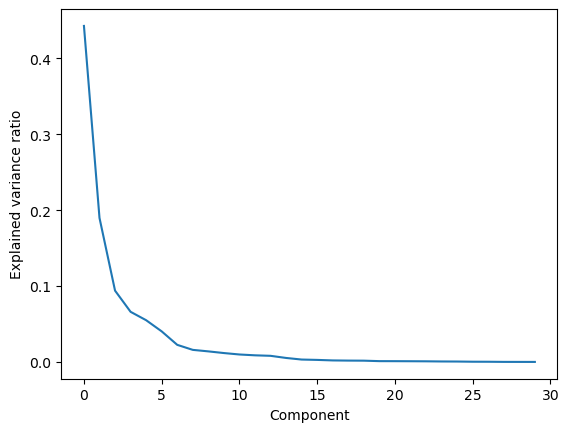

In [4]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Explained variance ratio")

In [5]:
pca = PCA(n_components=5)
X_pc = pca.fit_transform(X)

<Axes: >

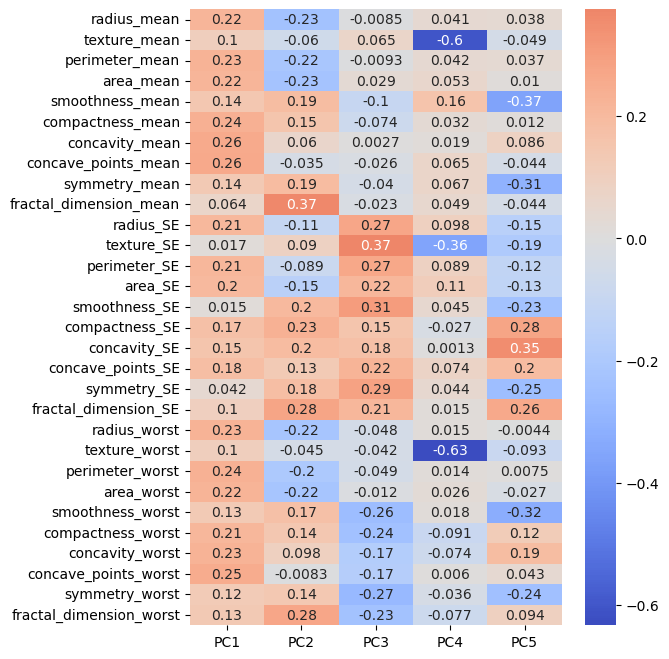

In [6]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df.columns[1:])
plt.figure(figsize=(6,8))
sns.heatmap(loadings, annot=True, center=0.0, cmap='coolwarm')

Text(0, 0.5, 'PC2')

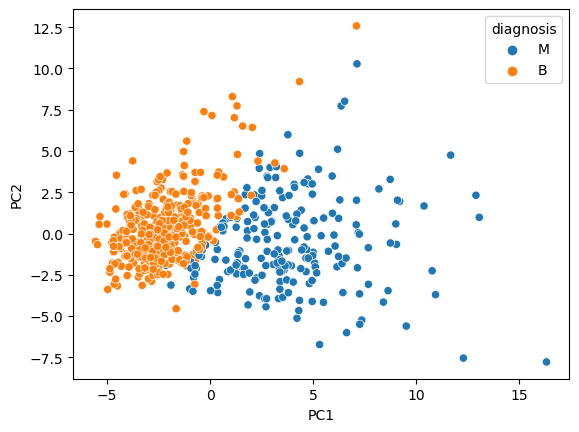

In [7]:
sns.scatterplot(x=X_pc[:, 0], y=X_pc[:, 1], hue=y)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [8]:
lm = LogisticRegression()
cv = pd.DataFrame(cross_validate(lm, X, y))
cv.mean()

fit_time      0.007550
score_time    0.000000
test_score    0.980686
dtype: float64

## Zadania
1. Zbiór MNIST zawiera obrazy odręcznie napisanych cyfr. Każda z 784 kolumn odpowiada jednemu pikselowi obrazu. Użyj PCA do redukcji wymiarowości zbioru i stwórz model klasyfikujący cyfry. Zbiór można wczytać w następujący sposób:

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", parser="auto")
X = mnist.data
y = mnist.target
X = scale(X)

2. Wczytaj zbiór w `housing.csv`. Usuń wiersze zawierające brakujące wartości. Koduj zmienne kategoryczne metodą `get_dummies()`. Skaluj dane.
    - Użyj [`KMeans()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) do grupowania zbioru.
    - Stwórz wykres zależności WCSS (atrybut `inertia_`) od `n_clusters`. Na podstawie wykresu wybierz odpowiednią liczbę grup.
    - Wizualizuj dane po grupowaniu. Stwórz na przykład wykres punktowy `latitude`/`longitude`, gdzie kolor reprezentuje indeks grupy (dostępny w atrybucie `labels_`) oraz wybrane inne wykresy.
    - Grupuj zbiór przy pomocy [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). Liczbę grup można regulować parametrem `n_clusters` lub `distance_threshold`. Porównaj wizualnie grupowania stworzone przez k-means i grupowanie aglomeracyjne.
